# Final Project 4: Clustering

- Celin Manongko - PYTN-KS10-018
- Alina Florencia Karuniawati - PYTN-KS10-001
- Nine Alvariqati Varqa Ansori - PYTN-KS10-010

# Introduction or Background Analysis

> Marketing strategy is a fundamental tool to achieve company goals. Using marketing strategy, a company can develop a sustainable competitive advantage across their market. Moreover, it also can be utilized to provide their target market. In this case, we utilize the behavior of approximately 8500+ active credit card holders during the last 6 months in terms of developing a customer segmentation to define market strategy. This dataset contains 18 behavior variables of customer.

# Install Package

In [1]:
#Kalau belum punya library kneed bisa dibuka untuk tanda # di depan !pip

#!pip install kneed

# Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data Loading

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


> This dataset contains of 8950 rows and 18 columns with the variables below:
> 1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases 
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Data Shape

In [4]:
df.shape

(8950, 18)

> Data ini terdiri dari 18 kolom dan 8950 baris

# Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

> Setiap kolom yang ada pada dataset sudah memiliki tipe data yang sesuai dengan jenis datanya. Namun dapat kita lihat bahwa untuk memproses dataset "CC GENERAL.csv" kita menggunakan memory sebesar **1.2+MB**

# Data Cleaning

## Check Duplicated Data

In [6]:
df.duplicated().sum()

0

> Berdasarkan pengecekan di atas tidak terdapat data yang bersifat duplikat

## Drop Unnecessary Column

Kolom CUST_ID dibuang karena tidak relevan dengan analisis

In [7]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [8]:
len(df.columns)

17

> Setelah kolom CUST_ID dibuang, jumlah kolom menjadi 17

## Check Uniqueness of Data

In [9]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
for col in df:
    print("Nilai unik dalam kolom: ", col.upper())
    print(df[col].unique())

Nilai unik dalam kolom:  BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
Nilai unik dalam kolom:  BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
Nilai unik dalam kolom:  PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
Nilai unik dalam kolom:  ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
Nilai unik dalam kolom:  INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
Nilai unik dalam kolom:  CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
Nilai unik dalam kolom:  PURCHASES_FREQUENCY
[0.166667 0

> Berdasarkan pengecekan keunikan data pada setiap kolom, didapati bahwa terdapat nan pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS. Selanjutnya kita akan mengecek jumlah data yang bersifat nan pada kedua kolom tersebut.

## Check Missing Values

In [11]:
mv = pd.DataFrame(df.isnull().sum(), columns = ["Number of Missing Values"])
mv['Percentage of Missing Values'] = (mv/len(df))*100
mv

,Number of Missing Values,Percentage of Missing Values
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000


> Berdasarkan pengecekan missing values di atas, jumlah data yang bersifat NaN tidak banyak hanya sekitar 3%. Oleh karena itu, kami memutuskan untuk membuang data yang bersifat null.

## Remove Missing Values

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

> Dapat dilihat bahwa missing values telah berhasil dibuang

In [14]:
df.shape

(8636, 17)

> Setelah missing values dibuang, data ini menjadi terdiri dari 8636 baris dan 17 kolom

## Check Outliers

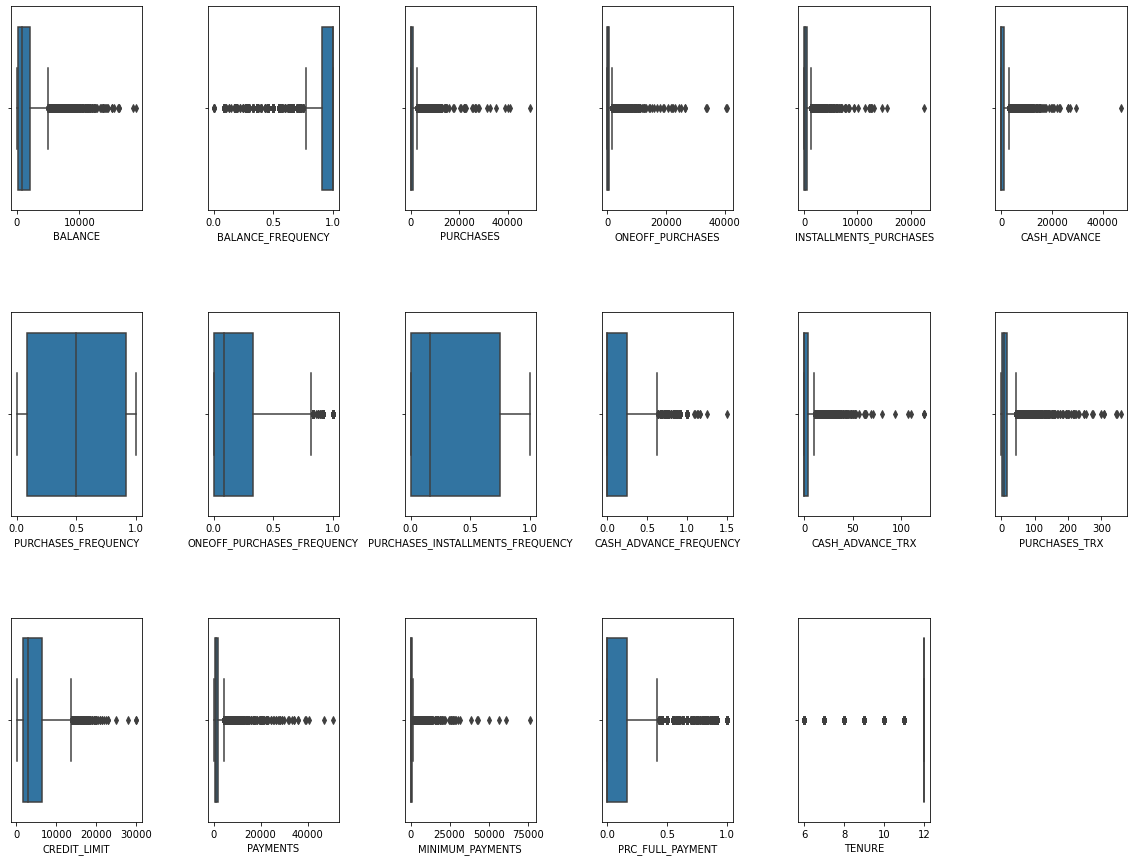

In [15]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,6,1)
sns.boxplot(x=df['BALANCE'])

ax = fig.add_subplot(3,6,2)
sns.boxplot(x=df['BALANCE_FREQUENCY'])

ax = fig.add_subplot(3,6,3)
sns.boxplot(x=df['PURCHASES'])

ax = fig.add_subplot(3,6,4)
sns.boxplot(x=df['ONEOFF_PURCHASES'])

ax = fig.add_subplot(3,6,5)
sns.boxplot(x=df['INSTALLMENTS_PURCHASES'])

ax = fig.add_subplot(3,6,6)
sns.boxplot(x=df['CASH_ADVANCE'])

ax = fig.add_subplot(3,6,7)
sns.boxplot(x=df['PURCHASES_FREQUENCY'])

ax = fig.add_subplot(3,6,8)
sns.boxplot(x=df['ONEOFF_PURCHASES_FREQUENCY'])

ax = fig.add_subplot(3,6,9)
sns.boxplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'])

ax = fig.add_subplot(3,6,10)
sns.boxplot(x=df['CASH_ADVANCE_FREQUENCY'])

ax = fig.add_subplot(3,6,11)
sns.boxplot(x=df['CASH_ADVANCE_TRX'])

ax = fig.add_subplot(3,6,12)
sns.boxplot(x=df['PURCHASES_TRX'])

ax = fig.add_subplot(3,6,13)
sns.boxplot(x=df['CREDIT_LIMIT'])

ax = fig.add_subplot(3,6,14)
sns.boxplot(x=df['PAYMENTS'])

ax = fig.add_subplot(3,6,15)
sns.boxplot(x=df['MINIMUM_PAYMENTS'])

ax = fig.add_subplot(3,6,16)
sns.boxplot(x=df['PRC_FULL_PAYMENT'])

ax = fig.add_subplot(3,6,17)
sns.boxplot(x=df['TENURE'])

plt.show()

> Dari pengecekan outliers menggunakan boxplot, outliers terdapat pada hampir seluruh kolom kecuali pada kolom PURCHASES_FREQUENCY. Selanjutnya kita akan melihat proporsi data yang bersifat outliers untuk memutuskan apakah outliers akan dibuang atau tidak.

## Check Proportion of Outliers Data using Upper Fence and Lower Fence

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(Q1)
print(Q3)

BALANCE                              148.095189
BALANCE_FREQUENCY                      0.909091
PURCHASES                             43.367500
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                 0.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.083333
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.000000
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          1.000000
CREDIT_LIMIT                        1600.000000
PAYMENTS                             418.559237
MINIMUM_PAYMENTS                     169.163545
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
Name: 0.25, dtype: float64
BALANCE                             2105.195853
BALANCE_FREQUENCY                      1.000000
PURCHASES                           1145.980000
ONEOFF_PURCHA

In [17]:
IQR = Q3-Q1
print(IQR)

BALANCE                             1957.100664
BALANCE_FREQUENCY                      0.090909
PURCHASES                           1102.612500
ONEOFF_PURCHASES                     599.100000
INSTALLMENTS_PURCHASES               484.147500
CASH_ADVANCE                        1132.385490
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.333333
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.250000
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         17.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1532.582853
MINIMUM_PAYMENTS                     656.332917
PRC_FULL_PAYMENT                       0.166667
TENURE                                 0.000000
dtype: float64


In [18]:
len((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))

8636

> Berdasarkan pengecekan outliers, dapat dilihat bahwa terdapat 8636 data yang bersifat outliers. Jumlah data yang bersifat outliers sangat banyak, sehingga kami tidak membuang outliers tersebut

# Descriptive Statistics

In [19]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


>- Rata-rata dari balance pemegang kartu kredit aktif adalah sebesar 1601.22 dan standard deviation sebesar 2095.57. 
>- Rata-rata seberapa seringnya balance dari pemegang kartu kredit aktif adalah sebesar 0.895 dan standard deviation sebesar 0.21. 
>- Rata-rata purchases dari pemegang kartu kredit aktif adalah 1025.43 dan standard deviation sebesar 2167.11.
>- Rata-rata oneoff_purchases pemegang kartu kredit aktif adalah sebesar 604.901 dan standard deviation sebesar 1684.31.
>- Rata-rata installments_purchases pemegang kartu kredit aktif adalah sebesar 420.84 dan standard deviation sebesar 917.25.
>- Rata-rata cash advance pemegang kartu kredit aktif adalah sebesar 994.18 dan standard deviation sebesar 2121.45
>- Rata-rata purchases frequency pemegang kartu kredit aktif adalah sebesar 0.496 dan standard deviation sebesar 0.401.
>- Rata-rata one off purchases frequency dari pemegang kartu kredit aktif adalah sebesar 0.205 dan standard deviation sebesar 0.3
>- Rata-rata purchases installments frequency adalah 0.37 dan standard deviasi sebesar 0.398.
>- Rata-rata credit limit pemegang kartu kredit aktif adlaah 4522.09 dan standard deviasi sebesar 3659.24
>- Rata-rata tenure pemegang kartu kredit aktif adalah 11.53 dan standard deviation sebesar 1.31

# Exploratory Data Analysis (EDA)

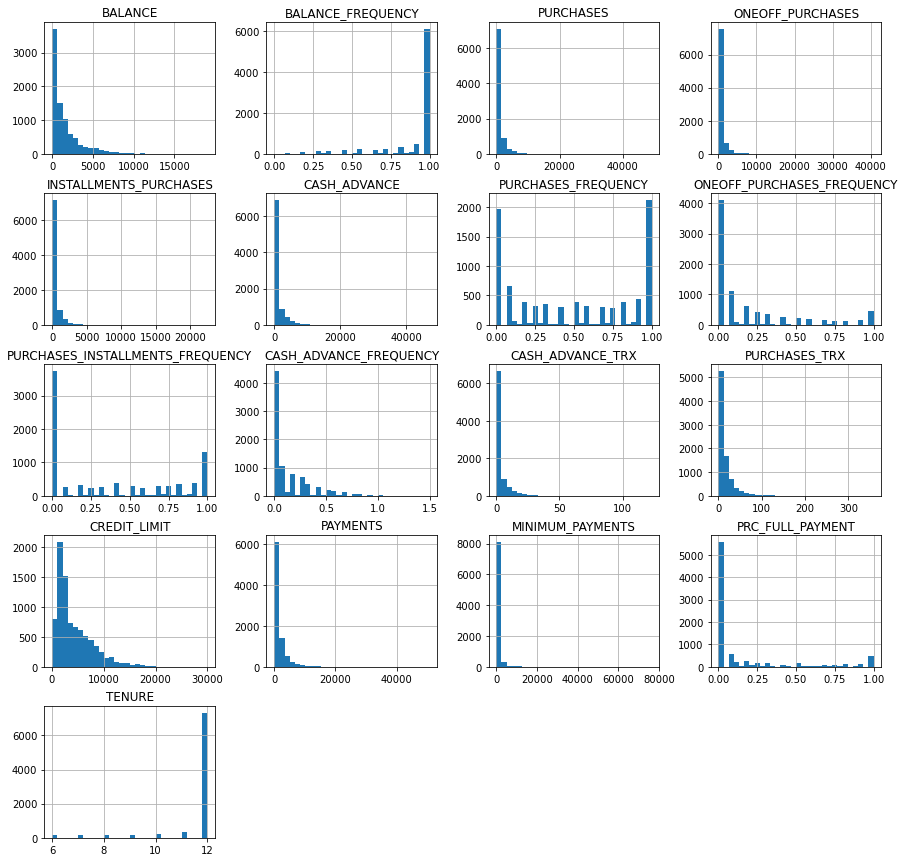

In [20]:
df.hist(bins=30, figsize=(15,15))
plt.show()

> - Berdasarkan histogram-histogram di atas variabel yang tergolong right skewed adalah balance, purchases, oneoff_purchases, installments_purchases, cash_advance, oneoff_purchases_frequency, cash_advance_frequency, cash advance_trx, purchases_trx, credit_limit, payments, minimum_payments, dan prc_full_payment
> - Berdasarkan histogram-histogram di atas variabel yang tergolong left skewed adalah balance_frequency dan tenure
> - Berdasarkan histogram-histogram di atas variabel yang tergolong simetris adalah purchases_frequency dan purchases_installments_frequency

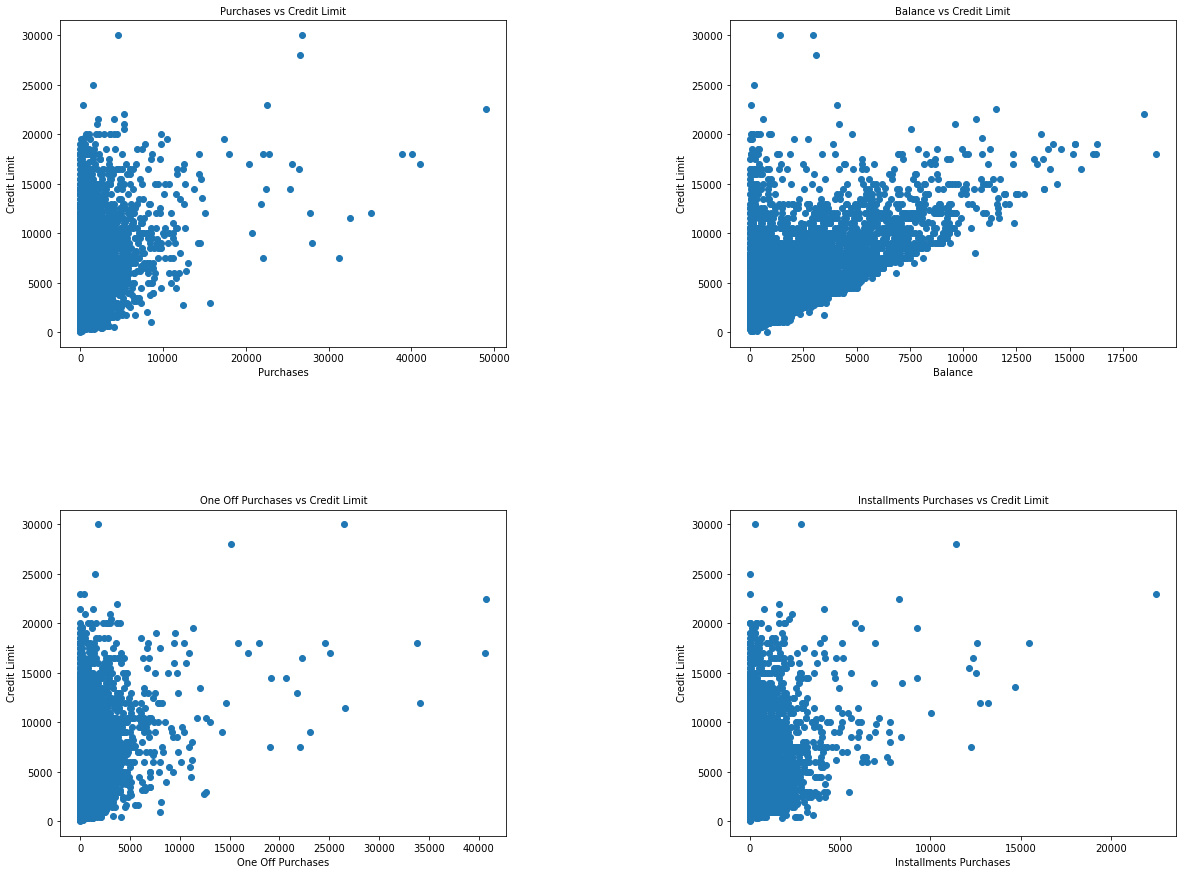

In [21]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,2,1)
plt.scatter(df.PURCHASES, df.CREDIT_LIMIT)
plt.ylabel('Credit Limit')
plt.xlabel('Purchases')
ax.set_title("Purchases vs Credit Limit", fontsize=10)

ax = fig.add_subplot(2,2,2)
plt.scatter(df.BALANCE,df.CREDIT_LIMIT)
plt.ylabel('Credit Limit')
plt.xlabel('Balance')
ax.set_title("Balance vs Credit Limit", fontsize=10)

ax = fig.add_subplot(2,2,3)
plt.scatter(df.ONEOFF_PURCHASES, df.CREDIT_LIMIT)
plt.ylabel('Credit Limit')
plt.xlabel('One Off Purchases')
ax.set_title("One Off Purchases vs Credit Limit", fontsize=10)

ax = fig.add_subplot(2,2,4)
plt.scatter( df.INSTALLMENTS_PURCHASES, df.CREDIT_LIMIT)
plt.ylabel('Credit Limit')
plt.xlabel('Installments Purchases')
ax.set_title("Installments Purchases vs Credit Limit", fontsize=10)


plt.show()

Dari scatter plot antara credit limit dengan purchases, balance, one off purchases, dan installments purchases dapat dilihat bahwa tidak terdapat hubungan yang linear. 

# Data Pre-Processing

## Check Multicollinearity using VIF

> *Multikolinearitas merupakan sebuah situasi yang menunjukkan adanya korelasi atau hubungan kuat antara dua variabel bebas. Untuk menghindari hal tersebut, kita menggunakan VIF untuk mengecek multikolinearitas antarvariabel*

In [22]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [23]:
iv = df
calc_vif(iv)

,Variables,VIF
0,BALANCE,4.161893
1,BALANCE_FREQUENCY,23.078996
2,PURCHASES,58509.808865
3,ONEOFF_PURCHASES,32612.469018
4,INSTALLMENTS_PURCHASES,10357.268059
5,CASH_ADVANCE,3.538666
6,PURCHASES_FREQUENCY,26.519081
7,ONEOFF_PURCHASES_FREQUENCY,5.689858
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.209188
9,CASH_ADVANCE_FREQUENCY,4.966228


> Berdasarkan pengecekan VIF di atas, nilai VIF yang paling besar adalah kolom PURCHASES. Oleh karena itu pertama kita akan mencoba untuk membuang kolom PURCHASES terlebih dahulu.

In [24]:
df.drop(['PURCHASES'], axis=1, inplace=True)

In [25]:
iv1 = df
calc_vif(iv1)

,Variables,VIF
0,BALANCE,4.161600
1,BALANCE_FREQUENCY,23.078516
2,ONEOFF_PURCHASES,2.732742
3,INSTALLMENTS_PURCHASES,2.532512
4,CASH_ADVANCE,3.538651
5,PURCHASES_FREQUENCY,26.513074
6,ONEOFF_PURCHASES_FREQUENCY,5.687103
7,PURCHASES_INSTALLMENTS_FREQUENCY,17.204389
8,CASH_ADVANCE_FREQUENCY,4.966169
9,CASH_ADVANCE_TRX,3.895087


> Setelah kolom PURCHASES dibuang, masih terdapat kolom yang memiliki nilai VIF di atas 5. Oleh karena itu kita akan membuang kolom dengan nilai VIF yang terbesar, yaitu PURCHASES_FREQUENCY

In [26]:
df.drop(['PURCHASES_FREQUENCY'], axis=1, inplace=True)

In [27]:
iv2 = df
calc_vif(iv2)

,Variables,VIF
0,BALANCE,4.157630
1,BALANCE_FREQUENCY,22.564246
2,ONEOFF_PURCHASES,2.732710
3,INSTALLMENTS_PURCHASES,2.528746
4,CASH_ADVANCE,3.535467
5,ONEOFF_PURCHASES_FREQUENCY,2.728372
6,PURCHASES_INSTALLMENTS_FREQUENCY,3.429570
7,CASH_ADVANCE_FREQUENCY,4.916130
8,CASH_ADVANCE_TRX,3.893509
9,PURCHASES_TRX,4.056858


> Setelah kolom PURCHASES dan PURCHASES_FREQUENCY dibuang, masih terdapat kolom yang memiliki nilai VIF di atas 5. Oleh karena itu kita akan membuang kolom dengan nilai VIF yang terbesar, yaitu BALANCE_FREQUENCY

In [28]:
df.drop(['BALANCE_FREQUENCY'], axis=1, inplace=True)

In [29]:
iv3 = df
calc_vif(iv3)

,Variables,VIF
0,BALANCE,3.986815
1,ONEOFF_PURCHASES,2.722258
2,INSTALLMENTS_PURCHASES,2.526463
3,CASH_ADVANCE,3.533244
4,ONEOFF_PURCHASES_FREQUENCY,2.622867
5,PURCHASES_INSTALLMENTS_FREQUENCY,3.216580
6,CASH_ADVANCE_FREQUENCY,4.700296
7,CASH_ADVANCE_TRX,3.870425
8,PURCHASES_TRX,4.037219
9,CREDIT_LIMIT,4.618244


> Setelah kolom PURCHASES, PURCHASES_FREQUENCY, dan BALANCE_FREQUENCY dibuang, dapat dilihat bahwa seluruh kolom telah memiliki VIF di bawah 5. Oleh karena itu, kolom-kolom tersebut yang akan digunakan sebagai variabel dalam pemodelan clustering.

## Splitting Data

> Kita akan membagi data menjadi dua yaitu data testing dengan proporsi sebesar 25% dan data training dengan proporsi sebesar 75%

In [30]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
train_index = train.index
test_index = test.index

## Standardizing the Data

> Kita akan melakukan proses standardization terhadap data train dan testing agar mean tiap kolom menjadi sama dengan nol dan std tiap kolom menjadi satu

In [31]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
train_scaled

array([[-0.39230042, -0.36280719, -0.25423042, ..., -0.18130834,
         0.0281351 ,  0.35851966],
       [-0.76182718, -0.36280719, -0.34208922, ..., -0.32183225,
         0.91490517,  0.35851966],
       [ 2.60351729, -0.36280719, -0.47294764, ..., 10.37915367,
        -0.5361759 ,  0.35851966],
       ...,
       [-0.75608964, -0.36280719, -0.36392192, ..., -0.31428181,
         1.15675371, -3.40872863],
       [ 2.1196393 , -0.36280719, -0.47294764, ...,  0.30916958,
        -0.25402209,  0.35851966],
       [ 0.07201598, -0.36280719,  0.23414699, ..., -0.08891027,
        -0.5361759 ,  0.35851966]])

In [32]:
test_scaled = scaler.transform(test)

# Modelling using K-Means

## Elbow Method

>Untuk menentukan jumlah cluster yang optimal kita akan menggunakan elbow method

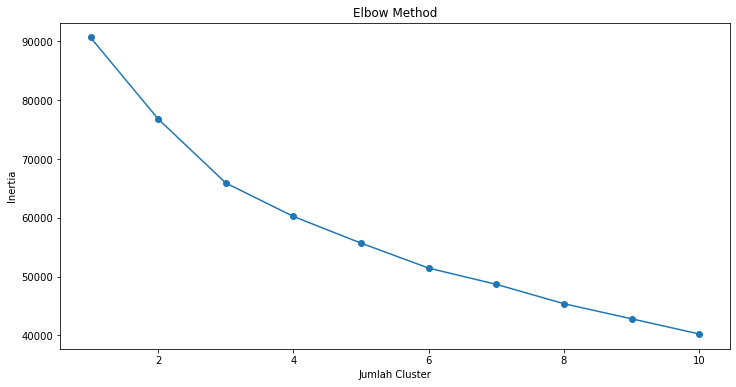

In [33]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(train_scaled)

    iner = kmeans.inertia_
    inertias.append(iner)
    
plt.figure(figsize=(12,6));
plt.plot(range(1,11), inertias, marker='o');
plt.xlabel("Jumlah Cluster");
plt.ylabel("Inertia");
plt.title("Elbow Method")
plt.show()

In [34]:
kl = KneeLocator(range(1, 11), inertias, curve = 'convex', direction = 'decreasing')
kl.elbow

4

>Berdasarkan grafik di atas jumlah cluster yang optimal adalah sebesar 4

## Modelling with Number of Clusters = 4

In [35]:
kmean = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
predicted_train = kmean.fit_predict(train_scaled)
print(predicted_train)

[3 2 1 ... 2 1 2]


## Model Evaluation

### Inertia Score

In [36]:
kmean.inertia_

60222.20485974517

> Skor inersia dari pemodelan menggunakan cluster berjumlah 4 adalah 60222.204

### Silhouette Score

In [37]:
score = silhouette_score(train_scaled, kmean.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.181


In [38]:
labels = kmean.labels_
labels

array([3, 2, 1, ..., 2, 1, 2])

In [39]:
clusters = kmean.predict(train_scaled)
train['cluster'] = clusters
train.head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2511,774.645244,0.0,190.54,2467.204866,0.0,0.333333,0.250000,4,6,1200.0,2365.524893,423.020200,0.166667,12,3
8058,8.809540,0.0,114.00,0.000000,0.0,0.666667,0.000000,0,8,4000.0,160.627029,86.700821,0.428571,12,2
4658,6983.408463,0.0,0.00,3354.686368,0.0,0.000000,0.333333,11,0,7700.0,1116.896212,25697.637720,0.000000,12,1
3449,1716.340133,0.0,184.23,0.000000,0.0,1.000000,0.000000,0,13,1700.0,510.451516,833.346049,0.000000,12,2
8732,51.071594,0.0,0.00,360.199098,0.0,0.000000,0.555556,14,0,500.0,0.049513,67.786744,0.000000,9,3


# PCA

In [40]:
pca = PCA(2)
principalComponents = pca.fit_transform(train_scaled)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green',3:'yellow'}

(6477, 2)


In [41]:
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)

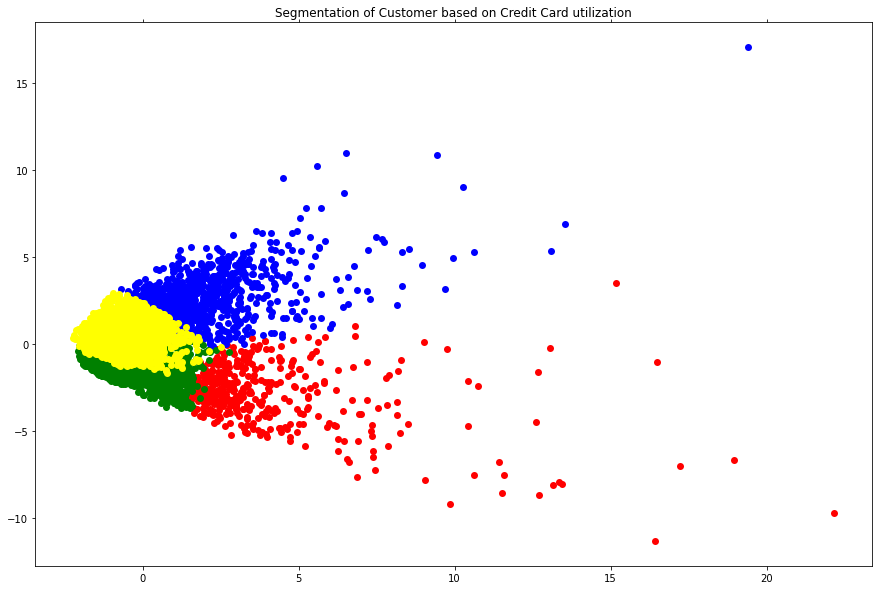

In [42]:
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Segmentation of Customer based on Credit Card utilization")
plt.show()

# Cluster Analysis and Characteristics

In [43]:
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = train.describe().loc[['mean']].T

df_cluster_summary = train.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlGnBu').hide_index()

Column Name,Metrics,0,1,2,3,Overall
BALANCE,mean,3179.578265,4510.396290,563.288105,1237.852156,1587.678835
ONEOFF_PURCHASES,mean,3983.478568,321.916671,435.750000,297.853308,596.235980
INSTALLMENTS_PURCHASES,mean,2156.623273,197.137884,634.556749,69.783230,412.018042
CASH_ADVANCE,mean,651.245064,4714.154786,118.287205,641.403072,1016.055677
ONEOFF_PURCHASES_FREQUENCY,mean,0.712586,0.142055,0.215355,0.142731,0.204944
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.803681,0.202674,0.728508,0.098492,0.364966
CASH_ADVANCE_FREQUENCY,mean,0.076911,0.494877,0.024531,0.127939,0.139885
CASH_ADVANCE_TRX,mean,1.886364,14.928324,0.461027,2.350065,3.384746
PURCHASES_TRX,mean,77.402273,8.216185,19.587928,4.411017,14.807781
CREDIT_LIMIT,mean,9185.113636,7543.184446,3958.779141,3306.350500,4483.473706


>- Cluster 0 merupakan nasabah kartu kredit yang aktif. Hal ini dapat dilihat dari rata-rata frekuensi one off purchases dan installments purchases yang paling tinggi daripada cluster lain, serta rata-rata balance yang cukup tinggi. Kemudian, nasabah pada cluster ini juga memiliki limit credit yang paling tinggi daripada cluster lain. Selain itu, tenure yang relatif tinggi menunjukkan bahwa credit scoring dari cluster ini baik. Oleh karena itu dapat disimpulkan bahwa nasabah pada klaster ini merupakan nasabah yang menggunakan kartu kredit untuk melakukan pembayaran secara penuh
>- Cluster 1 merupakan nasabah kartu kredit yang memiliki rata-rata balance, cash advance, dan cash advance frequency yang paling tinggi. Selain itu, nasabah di klaster ini memiliki limit kredit dan pembayaran tertinggi kedua dari keempat klaster tersebut. Namun, pengguna kartu kredit di klaster ini jarang melakukan cicilan atau one-off purchase dan memiliki tenor paling kecil dari keempat cluster. Dengan demikian, dapat disimpulkan bahwa nasabah pada klaster ini hanya menggunakan kartu kredit untuk keperluan penarikan uang atau tarik tunai.
>- Cluster 2 merupakan nasabah kartu kredit yang rata-rata purchases_installments frequency dan installments purchases tertinggi kedua, tetapi rata-rata frekuensi one off purchases yang relatif rendah dan rata-rata balance yang paling rendah. Ditambah lagi, nasabah pada cluster ini memiliki rata-rata frekuensi transaksi tunai di muka sangat kecil. Oleh karena itu, dapat disimpulkan bahwa nasabah pada klaster ini sangat cocok menggunakan kartu kredit untuk kebutuhan cicilan.
>- Cluster 3 merupakan nasabah kartu kredit yang jarang menggunakan kartu kredit untuk transaksi dan cicilan. Hal ini dikarenakan nasabah memiliki saldo yang relatif kecil, cicilan yang paling ringan, dan frekuensi cicilan paling kecil. Selain itu, limit kredit yang paling rendah juga mengilustrasikan bahwa nasabah jarang menggunakan kartu kredit untuk transaksi. Rendahnya saldo memungkinkan nasabah dalam klaster ini adalah pengguna baru yang menggunakan kartu kredit di bank ini.

# Conclusion

>- Nasabah pada cluster 0 adalah nasabah yang menggunakan kartu kredit untuk melakukan pembayaran secara penuh
>- Nasabah pada cluster 1 adalah nasabah yang menggunakan kartu kredit untuk keperluan penarikan uang secara tunai
>- Nasabah pada cluster 2 adalah nasabah yang menggunakan kartu kredit untuk keperluan cicilan
>- Nasabah pada cluster 3 adalah pengguna baru yang menggunakan kartu kredit di bank ini